# Spam Filtering

Email becomes a powerful tool for communication as it saves a lot of time and cost. It is one of the
most popular and secure medium for online transferring and communication messages or data
through the web. But, due to the social networks, most of the emails contain unwanted information
which is called spam. To identify such spam email is one of the important challenges.
In this project we will use PYTHON text classification technique to identify or classify email spam
message. We will find accuracy, time and error rate by applying suitable algorithms (such as
NaiveBayes, NaiveBayesMultinomial and J48 etc.) on Email Dataset and we will also compare which
algorithm is best for text classification.
Functional Requirements:
Administrator will perform all these tasks.
1. Collect Data Set
• Gathering the data for Email spam contains spam and non-spam messages

2. Pre-processing
• As most of the data in the real world are incomplete containing noisy and missing values. Therefore we have to     apply Pre-processing on your data.

3. Feature Selection
• After the pre-processing step, we apply the feature selection algorithm, the algorithm which deploy here is Best   First Feature Selection algorithm.

4. Apply Spam Filter Algorithms.
• Handle Data: Load the dataset and split it into training and test datasets.
• Summarize Data: summarize the properties in the training dataset so that we can calculate probabilities and make   predictions.
• Make a Prediction: Use the summaries of the dataset to generate a single prediction.
• Make Predictions: Generate predictions given a test dataset and a summarized training dataset.
• Evaluate Accuracy: Evaluate the accuracy of predictions made for a test dataset as the percentage correct out of   all predictions made.

5. Train & Test Data
• Split data into 70% training & 30% testing data sets.

6. Confusion Matrix
• Create a confusion matrix table to describe the performance of a classification model.

7. Accuracy
• Find Accuracy of all algorithm and compare.

## Importing Necessary Packages

In [1]:
import numpy
import pandas
import re
import os
import glob
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
df2 = pandas.read_csv("spam.csv", sep=",")
df2

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
document = df2.iloc[:, 1]

In [4]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, "html").get_text()  # 1. Remove HTML
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)  # 2. Remove non-letters
    words = letters_only.lower().split()  # 3. Convert to lower case, split into individual words
    stops = set(stopwords.words("english"))  # 4. creating set of stop words
    meaningful_words = [w for w in words if not w in stops]  # 5. creating list of meaningful words by using loop that
    # if words are not in stop set then they are meaningful
    return (" ".join(meaningful_words))  # 6. Join the words back into one string separated by space,
    # and return the result.

In [5]:
clean_train_reviews = []  # Initialize an empty list to hold the clean reviews
print("Cleaning and parsing the training set document...\n")
for i in range(0, len(document)):
    print(i, len(document))
    clean_train_reviews.append(review_to_words(document[i]))

Cleaning and parsing the training set document...

0 5572
1 5572
2 5572
3 5572
4 5572
5 5572
6 5572
7 5572
8 5572
9 5572
10 5572
11 5572
12 5572
13 5572
14 5572
15 5572
16 5572
17 5572
18 5572
19 5572
20 5572
21 5572
22 5572
23 5572
24 5572
25 5572
26 5572
27 5572
28 5572
29 5572
30 5572
31 5572
32 5572
33 5572
34 5572
35 5572
36 5572
37 5572
38 5572
39 5572
40 5572
41 5572
42 5572
43 5572
44 5572
45 5572
46 5572
47 5572
48 5572
49 5572
50 5572
51 5572
52 5572
53 5572
54 5572
55 5572
56 5572
57 5572
58 5572
59 5572
60 5572
61 5572
62 5572
63 5572
64 5572
65 5572
66 5572
67 5572
68 5572
69 5572
70 5572
71 5572
72 5572
73 5572
74 5572
75 5572
76 5572
77 5572
78 5572
79 5572
80 5572
81 5572
82 5572
83 5572
84 5572
85 5572
86 5572
87 5572
88 5572
89 5572
90 5572
91 5572
92 5572
93 5572
94 5572
95 5572
96 5572
97 5572
98 5572
99 5572
100 5572
101 5572
102 5572
103 5572
104 5572
105 5572
106 5572
107 5572
108 5572
109 5572
110 5572
111 5572
112 5572
113 5572
114 5572
115 5572
116 5572
117 55

/var/folders/sn/mv6gpvjx2mvd4038bxgrt8700000gn/T/ipykernel_3289/3086725174.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, "html").get_text()  # 1. Remove HTML


919 5572
920 5572
921 5572
922 5572
923 5572
924 5572
925 5572
926 5572
927 5572
928 5572
929 5572
930 5572
931 5572
932 5572
933 5572
934 5572
935 5572
936 5572
937 5572
938 5572
939 5572
940 5572
941 5572
942 5572
943 5572
944 5572
945 5572
946 5572
947 5572
948 5572
949 5572
950 5572
951 5572
952 5572
953 5572
954 5572
955 5572
956 5572
957 5572
958 5572
959 5572
960 5572
961 5572
962 5572
963 5572
964 5572
965 5572
966 5572
967 5572
968 5572
969 5572
970 5572
971 5572
972 5572
973 5572
974 5572
975 5572
976 5572
977 5572
978 5572
979 5572
980 5572
981 5572
982 5572
983 5572
984 5572
985 5572
986 5572
987 5572
988 5572
989 5572
990 5572
991 5572
992 5572
993 5572
994 5572
995 5572
996 5572
997 5572
998 5572
999 5572
1000 5572
1001 5572
1002 5572
1003 5572
1004 5572
1005 5572
1006 5572
1007 5572
1008 5572
1009 5572
1010 5572
1011 5572
1012 5572
1013 5572
1014 5572
1015 5572
1016 5572
1017 5572
1018 5572
1019 5572
1020 5572
1021 5572
1022 5572
1023 5572
1024 5572
1025 5572
1026 5572
1

2074 5572
2075 5572
2076 5572
2077 5572
2078 5572
2079 5572
2080 5572
2081 5572
2082 5572
2083 5572
2084 5572
2085 5572
2086 5572
2087 5572
2088 5572
2089 5572
2090 5572
2091 5572
2092 5572
2093 5572
2094 5572
2095 5572
2096 5572
2097 5572
2098 5572
2099 5572
2100 5572
2101 5572
2102 5572
2103 5572
2104 5572
2105 5572
2106 5572
2107 5572
2108 5572
2109 5572
2110 5572
2111 5572
2112 5572
2113 5572
2114 5572
2115 5572
2116 5572
2117 5572
2118 5572
2119 5572
2120 5572
2121 5572
2122 5572
2123 5572
2124 5572
2125 5572
2126 5572
2127 5572
2128 5572
2129 5572
2130 5572
2131 5572
2132 5572
2133 5572
2134 5572
2135 5572
2136 5572
2137 5572
2138 5572
2139 5572
2140 5572
2141 5572
2142 5572
2143 5572
2144 5572
2145 5572
2146 5572
2147 5572
2148 5572
2149 5572
2150 5572
2151 5572
2152 5572
2153 5572
2154 5572
2155 5572
2156 5572
2157 5572
2158 5572
2159 5572
2160 5572
2161 5572
2162 5572
2163 5572
2164 5572
2165 5572
2166 5572
2167 5572
2168 5572
2169 5572
2170 5572
2171 5572
2172 5572
2173 5572


3244 5572
3245 5572
3246 5572
3247 5572
3248 5572
3249 5572
3250 5572
3251 5572
3252 5572
3253 5572
3254 5572
3255 5572
3256 5572
3257 5572
3258 5572
3259 5572
3260 5572
3261 5572
3262 5572
3263 5572
3264 5572
3265 5572
3266 5572
3267 5572
3268 5572
3269 5572
3270 5572
3271 5572
3272 5572
3273 5572
3274 5572
3275 5572
3276 5572
3277 5572
3278 5572
3279 5572
3280 5572
3281 5572
3282 5572
3283 5572
3284 5572
3285 5572
3286 5572
3287 5572
3288 5572
3289 5572
3290 5572
3291 5572
3292 5572
3293 5572
3294 5572
3295 5572
3296 5572
3297 5572
3298 5572
3299 5572
3300 5572
3301 5572
3302 5572
3303 5572
3304 5572
3305 5572
3306 5572
3307 5572
3308 5572
3309 5572
3310 5572
3311 5572
3312 5572
3313 5572
3314 5572
3315 5572
3316 5572
3317 5572
3318 5572
3319 5572
3320 5572
3321 5572
3322 5572
3323 5572
3324 5572
3325 5572
3326 5572
3327 5572
3328 5572
3329 5572
3330 5572
3331 5572
3332 5572
3333 5572
3334 5572
3335 5572
3336 5572
3337 5572
3338 5572
3339 5572
3340 5572
3341 5572
3342 5572
3343 5572


4413 5572
4414 5572
4415 5572
4416 5572
4417 5572
4418 5572
4419 5572
4420 5572
4421 5572
4422 5572
4423 5572
4424 5572
4425 5572
4426 5572
4427 5572
4428 5572
4429 5572
4430 5572
4431 5572
4432 5572
4433 5572
4434 5572
4435 5572
4436 5572
4437 5572
4438 5572
4439 5572
4440 5572
4441 5572
4442 5572
4443 5572
4444 5572
4445 5572
4446 5572
4447 5572
4448 5572
4449 5572
4450 5572
4451 5572
4452 5572
4453 5572
4454 5572
4455 5572
4456 5572
4457 5572
4458 5572
4459 5572
4460 5572
4461 5572
4462 5572
4463 5572
4464 5572
4465 5572
4466 5572
4467 5572
4468 5572
4469 5572
4470 5572
4471 5572
4472 5572
4473 5572
4474 5572
4475 5572
4476 5572
4477 5572
4478 5572
4479 5572
4480 5572
4481 5572
4482 5572
4483 5572
4484 5572
4485 5572
4486 5572
4487 5572
4488 5572
4489 5572
4490 5572
4491 5572
4492 5572
4493 5572
4494 5572
4495 5572
4496 5572
4497 5572
4498 5572
4499 5572
4500 5572
4501 5572
4502 5572
4503 5572
4504 5572
4505 5572
4506 5572
4507 5572
4508 5572
4509 5572
4510 5572
4511 5572
4512 5572


In [6]:
vectorizer = TfidfVectorizer(stop_words=None, max_features=1000)
train_data_features = vectorizer.fit_transform(clean_train_reviews)

['abiola' 'able' 'abt' 'ac' 'accept' 'access' 'account' 'across'
 'actually' 'address' 'admirer' 'aft' 'afternoon' 'age' 'ago' 'ah' 'aight'
 'al' 'almost' 'alone' 'already' 'alright' 'also' 'always' 'angry'
 'another' 'ans' 'answer' 'anyone' 'anything' 'anytime' 'anyway' 'apply'
 'ard' 'area' 'around' 'asap' 'ask' 'askd' 'asked' 'asking' 'ass'
 'attempt' 'auction' 'available' 'await' 'award' 'awarded' 'away'
 'awesome' 'babe' 'baby' 'back' 'bad' 'balance' 'bank' 'bath' 'bathe' 'bb'
 'bcoz' 'beautiful' 'bed' 'believe' 'best' 'better' 'big' 'bill'
 'birthday' 'bit' 'blood' 'blue' 'bluetooth' 'bold' 'bonus' 'book'
 'booked' 'bored' 'boss' 'bout' 'box' 'boy' 'boytoy' 'break' 'bring'
 'brings' 'brother' 'bslvyl' 'bt' 'bus' 'busy' 'buy' 'buying' 'bx' 'call'
 'called' 'caller' 'callertune' 'calling' 'calls' 'camcorder' 'came'
 'camera' 'cant' 'car' 'card' 'care' 'carlos' 'case' 'cash' 'catch'
 'cause' 'cd' 'chance' 'change' 'charge' 'charged' 'charity' 'chat'
 'cheap' 'check' 'checking' 'chen

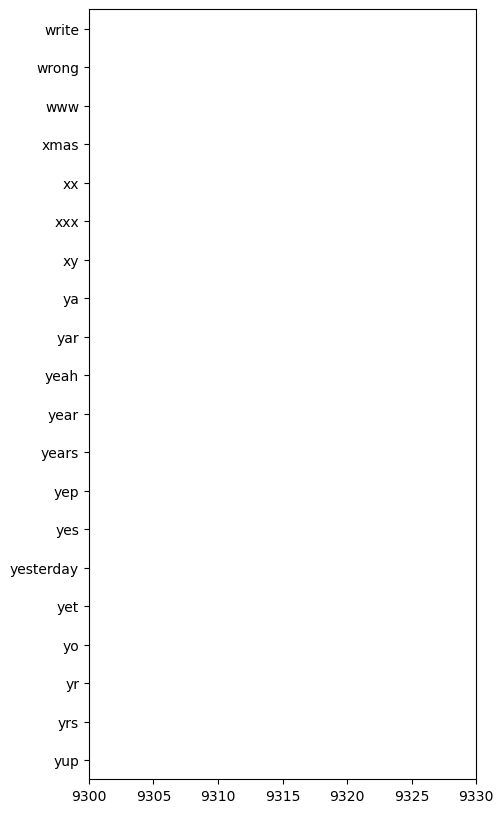

In [7]:
HPL_dictionary =vectorizer.vocabulary_.items()
tf=vectorizer.get_feature_names_out()
print(tf)
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in HPL_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index    
HPL_vocab = pandas.Series(count, index=vocab)
# sort the dataframe
HPL_vocab = HPL_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = HPL_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9300, 9330))
plt.savefig("features.png")

## Training and Testing Data

In [8]:
X = train_data_features.toarray()  # Numpy arrays are easy to work with, so convert the result to an
Y = df2.iloc[:, 0]
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [9]:
ros = SMOTE()
X,Y= ros.fit_resample(X, Y)
print ("after Smote",len(X))

after Smote 9650


In [10]:
trainx, testx, trainy, testy = train_test_split(X, Y, test_size=0.30, train_size=0.70, random_state=20000, shuffle=True)

## Guassian NB

In [11]:
model = GaussianNB()

In [12]:
model = model.fit(trainx, trainy)
print(sklearn.metrics.classification_report(testy, model.predict(testx)))
print("Final Accuracy: %s" % accuracy_score(testy, model.predict(testx)))

              precision    recall  f1-score   support

         ham       0.99      0.80      0.88      1491
        spam       0.82      0.99      0.90      1404

    accuracy                           0.89      2895
   macro avg       0.91      0.90      0.89      2895
weighted avg       0.91      0.89      0.89      2895

Final Accuracy: 0.8929188255613126


## Random Forest Classifier

In [13]:
model= RandomForestClassifier(n_estimators = 600) 

In [14]:
model = model.fit(trainx, trainy)
print(sklearn.metrics.classification_report(testy, model.predict(testx)))
print("Final Accuracy: %s" % accuracy_score(testy, model.predict(testx)))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1491
        spam       0.99      0.99      0.99      1404

    accuracy                           0.99      2895
   macro avg       0.99      0.99      0.99      2895
weighted avg       0.99      0.99      0.99      2895

Final Accuracy: 0.9899827288428324


## Logistic Regression

In [15]:
model= LogisticRegression(C=0.01) 

In [16]:
model = model.fit(trainx, trainy)
print(sklearn.metrics.classification_report(testy, model.predict(testx)))
print("Final Accuracy: %s" % accuracy_score(testy, model.predict(testx)))

              precision    recall  f1-score   support

         ham       0.89      0.97      0.93      1491
        spam       0.96      0.87      0.92      1404

    accuracy                           0.92      2895
   macro avg       0.93      0.92      0.92      2895
weighted avg       0.92      0.92      0.92      2895

Final Accuracy: 0.9215889464594128


## Support Vector Machine

In [20]:
model = svm.SVC(probability=True)

In [21]:
model = model.fit(trainx, trainy)
print(sklearn.metrics.classification_report(testy, model.predict(testx)))
print("Final Accuracy: %s" % accuracy_score(testy, model.predict(testx)))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1491
        spam       0.96      0.99      0.98      1404

    accuracy                           0.98      2895
   macro avg       0.98      0.98      0.98      2895
weighted avg       0.98      0.98      0.98      2895

Final Accuracy: 0.9792746113989638


## Visualization

In [22]:
from sklearn.metrics import classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import confusion_matrix

## ROC Curve

In [23]:
y_probas = model.predict_proba(testx)

/Users/ibrahimirfan/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


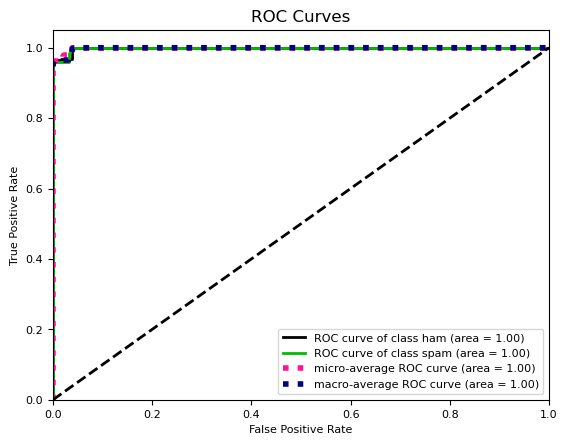

In [24]:
skplt.metrics.plot_roc_curve(testy, y_probas, text_fontsize=8)
plt.savefig("roc_curve.png")

## Precision Recall Curve

/Users/ibrahimirfan/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


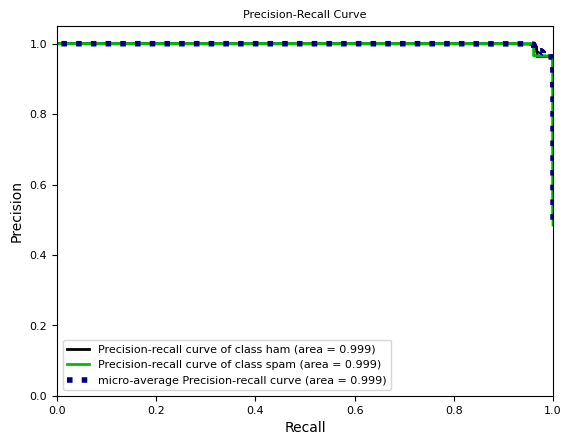

In [25]:
skplt.metrics.plot_precision_recall_curve(testy, y_probas,text_fontsize=8,title_fontsize=8)
plt.savefig("precision_recall.png")

## Learning Curve

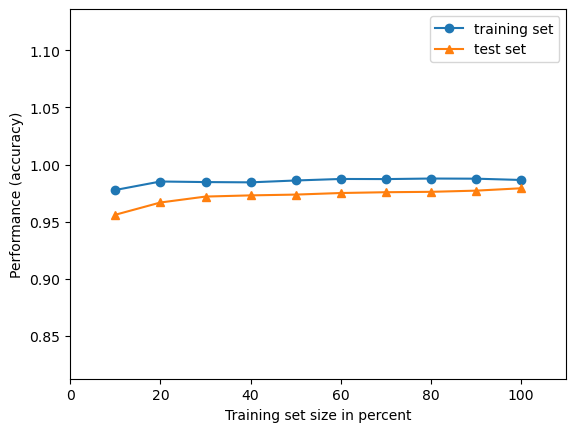

In [26]:
plot_learning_curves(trainx, trainy, testx, testy, model,scoring='accuracy',print_model=False)
plt.savefig("training_test.png")